Imagem colorida carregada com sucesso!
Imagem convertida para níveis de cinza.
Imagem binarizada usando limiar = 128.


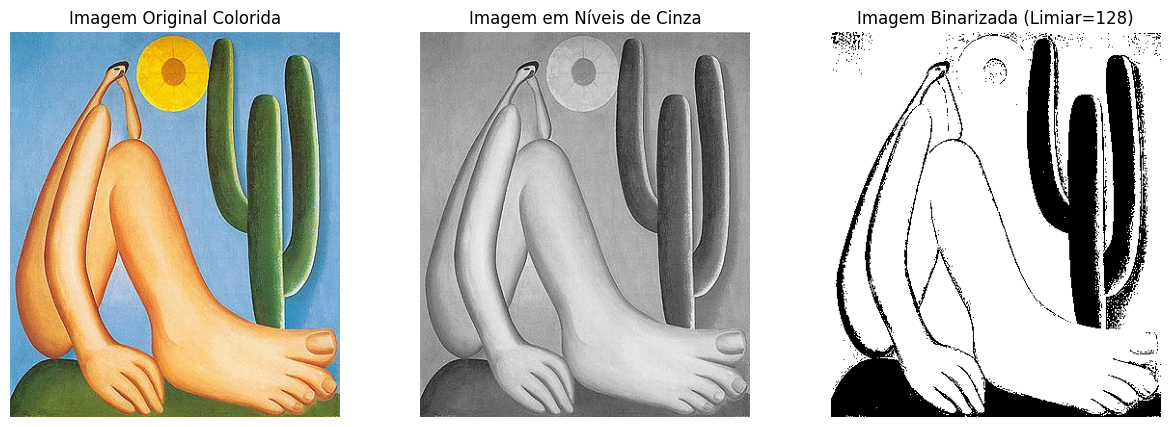

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar a Imagem Colorida
# Substitua 'Tarsila do Amaral.jpg' pelo caminho da sua imagem,
# ou use o arquivo que você já carregou no ambiente (se estiver no Colab).
# Certifique-se de que o arquivo esteja no mesmo diretório do seu script
# ou forneça o caminho completo.
try:
    img_colorida = Image.open('Tarsila do Amaral.jpg')
    print("Imagem colorida carregada com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'Tarsila do Amaral.jpg' não foi encontrado.")
    print("Por favor, verifique se o arquivo está no mesmo diretório do script ou forneça o caminho correto.")
    # Se você estiver no Colab e a imagem foi UPLOADED, o caminho já é esse:
    # img_colorida = Image.open('Tarsila do Amaral.jpg') # <-- Isso já deve funcionar
    exit() # Sai do programa se a imagem não for encontrada


# 2. Converter para Níveis de Cinza
# O método .convert('L') da Pillow faz isso diretamente,
# onde 'L' significa Luminosidade (escala de cinza).
img_cinza = img_colorida.convert('L')
print("Imagem convertida para níveis de cinza.")

# Opcional: Você pode converter para um array NumPy para manipulações mais avançadas
# img_cinza_np = np.array(img_cinza)


# 3. Binarizar a Imagem (Preto e Branco)
# Vamos definir um limiar. Pixels acima do limiar ficam brancos (255),
# e pixels abaixo ou iguais ao limiar ficam pretos (0).
# Um limiar de 128 é um bom ponto de partida para imagens em tons de cinza (0-255).
limiar = 128

# Criar uma nova imagem binarizada
# Iremos iterar sobre cada pixel da imagem em tons de cinza
# e aplicar a lógica do limiar.
# Para isso, vamos trabalhar com o array NumPy para facilitar.
img_cinza_np = np.array(img_cinza)
img_binarizada_np = np.zeros_like(img_cinza_np) # Cria um array de zeros com o mesmo formato

# Aplica o limiar:
# Onde o pixel for maior que o limiar, define como 255 (branco)
# Caso contrário, define como 0 (preto)
img_binarizada_np[img_cinza_np > limiar] = 255
img_binarizada_np[img_cinza_np <= limiar] = 0

# Converte o array NumPy de volta para um objeto Image para exibição/salvamento
img_binarizada = Image.fromarray(img_binarizada_np.astype(np.uint8))
print(f"Imagem binarizada usando limiar = {limiar}.")


# 4. Exibir as Imagens (usando Matplotlib)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_colorida)
plt.title('Imagem Original Colorida')
plt.axis('off') # Remove os eixos

plt.subplot(1, 3, 2)
plt.imshow(img_cinza, cmap='gray') # cmap='gray' é importante para exibir tons de cinza
plt.title('Imagem em Níveis de Cinza')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_binarizada, cmap='gray') # Binarizada também é exibida em tons de cinza
plt.title(f'Imagem Binarizada (Limiar={limiar})')
plt.axis('off')

plt.show()

# Opcional: Salvar as imagens resultantes
# img_cinza.save("tarsila_cinza.jpg")
# img_binarizada.save("tarsila_binarizada.jpg")
# print("Imagens salvas como 'tarsila_cinza.jpg' e 'tarsila_binarizada.jpg'")